In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ___FRED___
------------

In [16]:
fred = pd.read_csv(r"./FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10))
groot = pd.read_csv(r"./GRooTFullVersion.csv", low_memory=False, encoding="latin")
fred

,F00001,F00002,F00003,F00004,F00005,F00006,F00007,F00008,F00009,F00010,...,F01268,F01269,F01270,F01271,F01272,F01273,F01274,F01275,F01279,F00079
0,1,1,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,Long et al 2013,"Long Y, Kong D, Chen Z, Zeng H. 2013. Variatio...",10.1371/journal.pone.0057153,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57185,3,57516,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Species not found in TRY categorical traits pa...
57186,3,57517,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Species not found in TRY categorical traits pa...
57187,3,57518,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57188,3,57519,Lin et al 2020,"Lin D, Yang S, Dou P, Wang H, Wang F, Qian S, ...",10.1093/aob/mcz166,NaN,NaN,NaN,contributed,x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
meta = pd.read_csv(r"./FRED/FRED3_Column_Definitions_2021.csv", index_col=0, usecols=("column_id", "name"))
meta.name = meta.name.str.lower().str.replace(' ', '_').str.replace('/', '_')

In [7]:
with pd.option_context("display.max_rows", None):
    print(meta.name)

column_id
F00001                          version_fred_version_number
F00002                                         notes_row_id
F00003                         abbreviated_article_citation
F00004                                 data_source_citation
F00005                                      data_source_doi
F00006                                    data_set_citation
F00007                                         data_set_doi
F00008                                        notes_site_id
F00009                              data_raw_or_unpublished
F00010                                  data_duplicate_data
F00017                    plant_taxonomy_family_data_source
F00018                     plant_taxonomy_genus_data_source
F00019                   plant_taxonomy_species_data_source
F00020                plant_taxonomy_subspecies_data_source
F00027                     notes_single_or_multiple_species
F00032                                plant_growth_form_try
F00041                        

In [8]:
meta.name[meta.name.str.contains("photo")]

column_id
F00043       plant_photosynthetic_pathway
F01232                chamber_photoperiod
F01261       photosynthesis_per_leaf_area
F01262     n_photosynthesis_per_leaf_area
F01263    se_photosynthesis_per_leaf_area
Name: name, dtype: object

In [9]:
# F00043 - plant_photosynthetic_pathway

fred.loc[:, "F00043"].isna().mean() # :/

np.float64(0.34575974820772865)

In [10]:
fred.loc[:, "F00043"].dropna().unique()

array(['C3', 'C4', 'C3/CAM', 'C3/C4', 'CAM', 'C4/CAM'], dtype=object)

In [11]:
meta.name[meta.name.str.contains("root_cortex")]

column_id
F00104              root_cortex_thickness
F00105            n_root_cortex_thickness
F00106           se_root_cortex_thickness
F00107           sd_root_cortex_thickness
F00125       root_stele_root_cortex_ratio
F00126     n_root_stele_root_cortex_ratio
F00127    se_root_stele_root_cortex_ratio
Name: name, dtype: object

In [37]:
meta.name[meta.name.str.contains("plant_taxonomy")]

column_id
F00017         plant_taxonomy_family_data_source
F00018          plant_taxonomy_genus_data_source
F00019        plant_taxonomy_species_data_source
F00020     plant_taxonomy_subspecies_data_source
F01286         plant_taxonomy_accepted_genus_tpl
F01287       plant_taxonomy_accepted_species_tpl
F01289        plant_taxonomy_accepted_family_tpl
F01290         plant_taxonomy_accepted_order_apw
F01291         plant_taxonomy_accepted_group_tpl
F01344    plant_taxonomy_accepted_subspecies_tpl
F01413    plant_taxonomy_species_name_unresolved
Name: name, dtype: object

In [38]:
# F00679 - root_diameter
# F00727 - specific_root_length_(srl)
# F00104 - root_cortex_thickness
# F00125 - root_stele_root_cortex_ratio
data = fred.loc[:, ["F00043", "F00679", "F00727", "F00104", "F00125", "F00017", "F00018", "F00019"]].dropna(subset="F00043")
data.rename(mapper={"F00679": "root_diameter", "F00727": "specific_root_length", "F00104": "root_cortex_thickness", 
                   "F00125": "root_stele_root_cortex_ratio", "F00017": "plant_taxonomy_family_data_source", 
                    "F00018": "plant_taxonomy_genus_data_source", "F00019": "plant_taxonomy_species_data_source"}, axis=1, inplace=True)

In [39]:
data.groupby("F00043").count()

,root_diameter,specific_root_length,root_cortex_thickness,root_stele_root_cortex_ratio,plant_taxonomy_family_data_source,plant_taxonomy_genus_data_source,plant_taxonomy_species_data_source
F00043,,,,,,,
C3,6950,6338,297,91,6980,36393,36321
C3/C4,2,9,0,0,0,31,31
C3/CAM,2,6,0,0,0,24,24
C4,60,202,2,2,37,688,687
C4/CAM,0,0,0,0,0,1,1
CAM,107,1,0,0,1,132,132


In [60]:
with pd.option_context("display.max_rows", None):
    print(data.loc[:, ["F00043", "plant_taxonomy_family_data_source", "plant_taxonomy_genus_data_source"]].\
          groupby(["F00043", "plant_taxonomy_family_data_source"]).count())

                                          plant_taxonomy_genus_data_source
F00043 plant_taxonomy_family_data_source                                  
C3     Acardiaceae                                                      18
       Aceraceae                                                       197
       Actinidiaceae                                                     1
       Adiantaceae                                                       4
       Adoxaceae                                                         1
       Alangiaceae                                                       1
       Altingiacae                                                       3
       Altingiaceae                                                      1
       Amaranthaceae                                                     5
       Anacardiaceae                                                     5
       Anancardiaceae                                                   41
       Apiaceae          

In [ ]:
# the differences could be attributed to the lack of diversity in the data for C4 and CAM groups

In [14]:
np.unique(data.F00043, return_counts=True)

(array(['C3', 'C3/C4', 'C3/CAM', 'C4', 'C4/CAM', 'CAM'], dtype=object),
 array([36539,    31,    24,   689,     1,   132]))

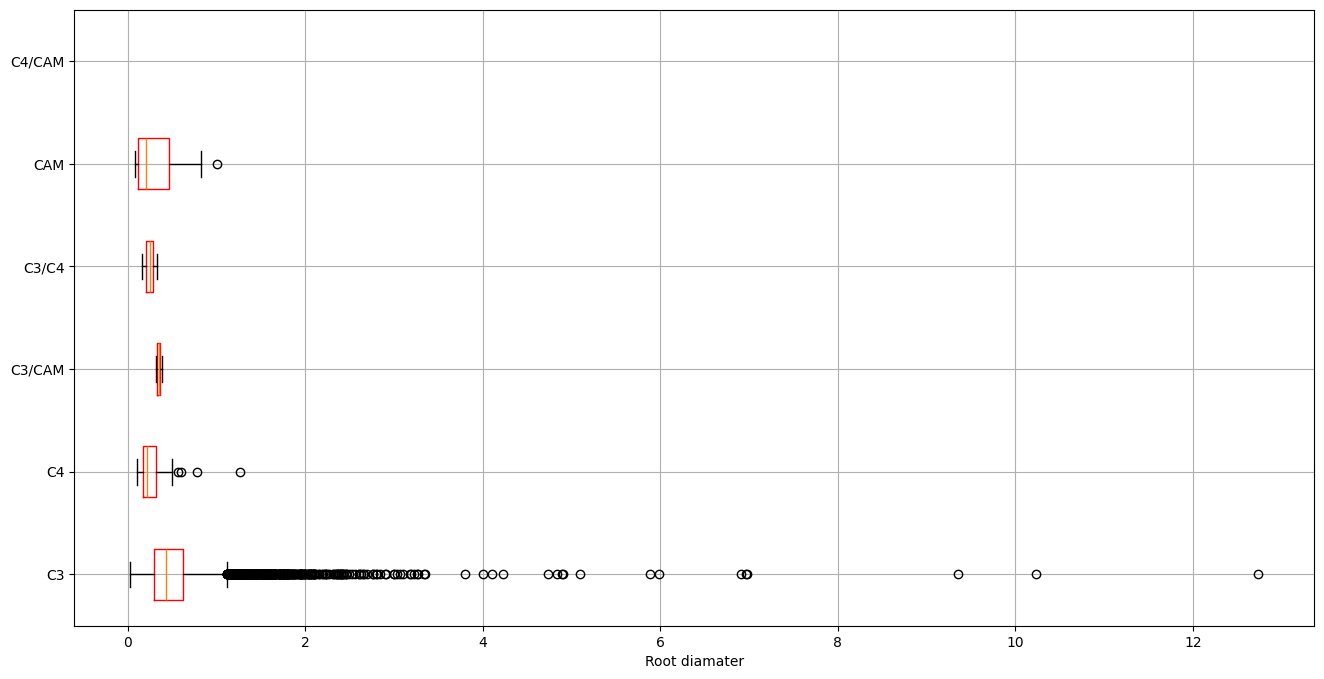

In [102]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_diameter.isna()) & (data.F00043 == pway), "root_diameter"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root diamater")
axes.grid()
plt.show()

In [101]:
data.loc[:, ["F00043", "root_cortex_thickness"]].dropna().F00043.unique() # that's disappointing

array(['C3', 'C4'], dtype=object)

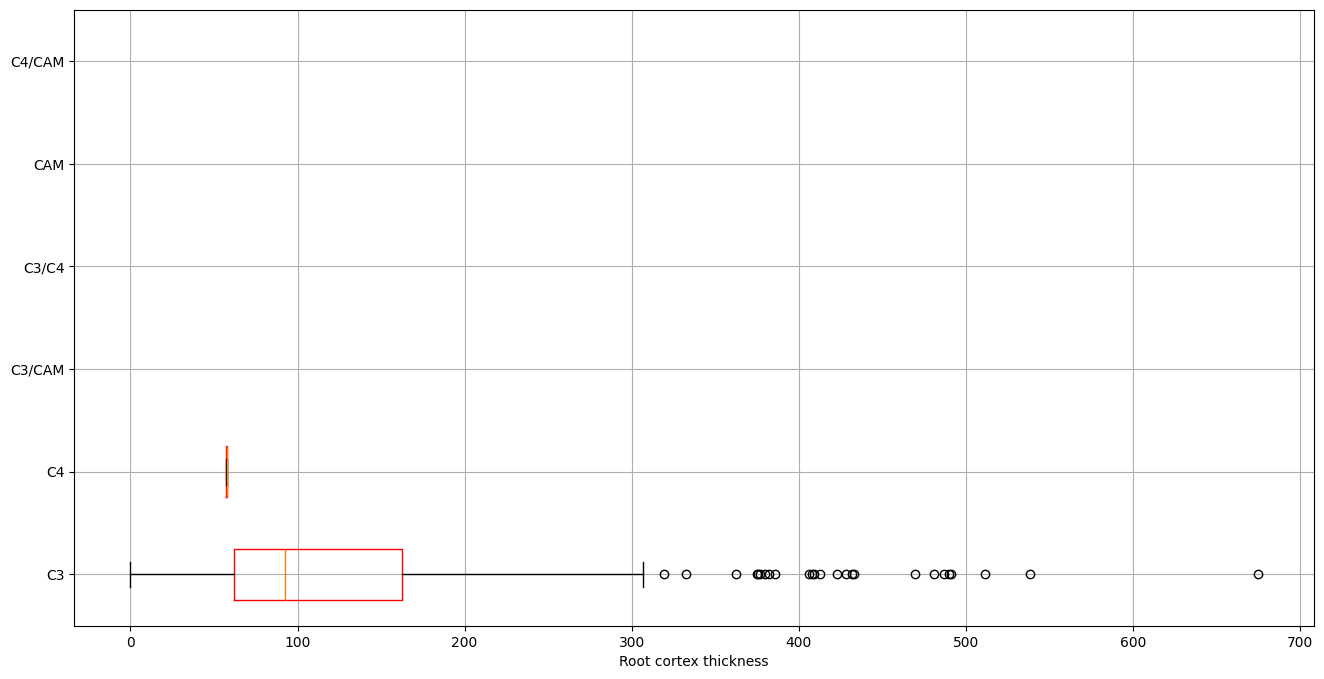

In [104]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_cortex_thickness.isna()) & (data.F00043 == pway), "root_cortex_thickness"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root cortex thickness")
axes.grid()
plt.show()

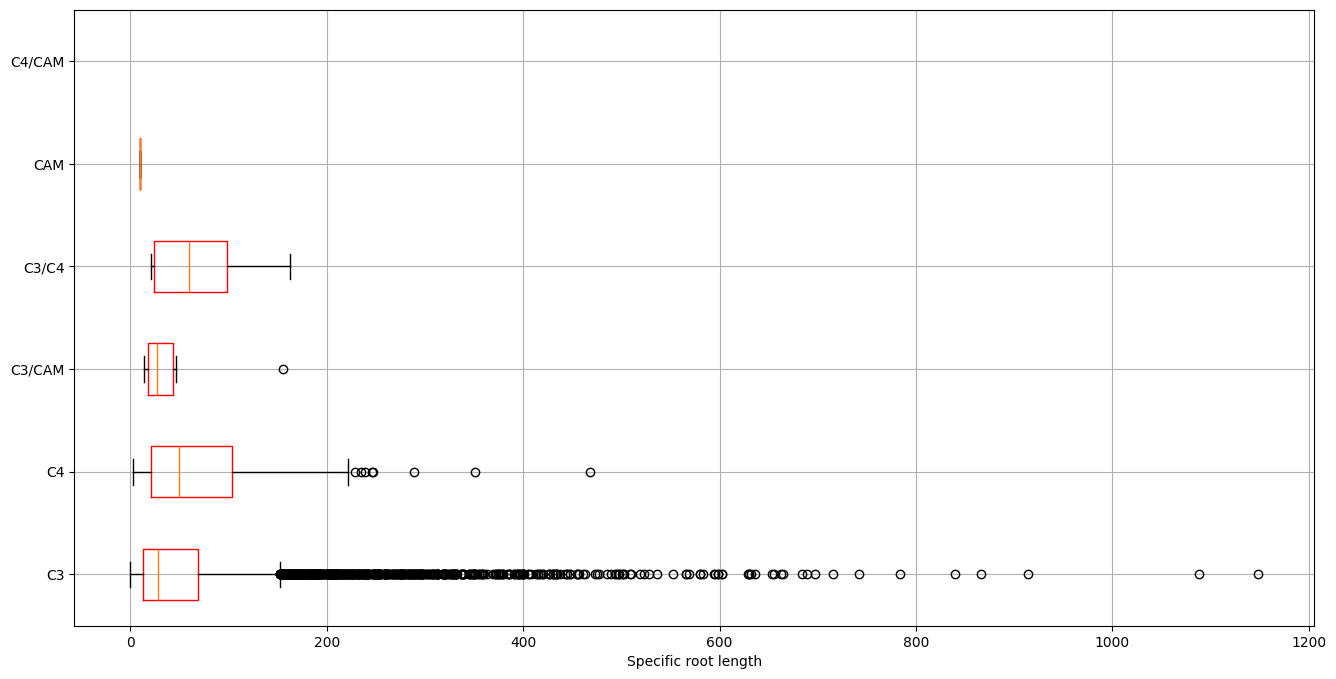

In [105]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.specific_root_length.isna()) & (data.F00043 == pway), "specific_root_length"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Specific root length")
axes.grid()
plt.show()

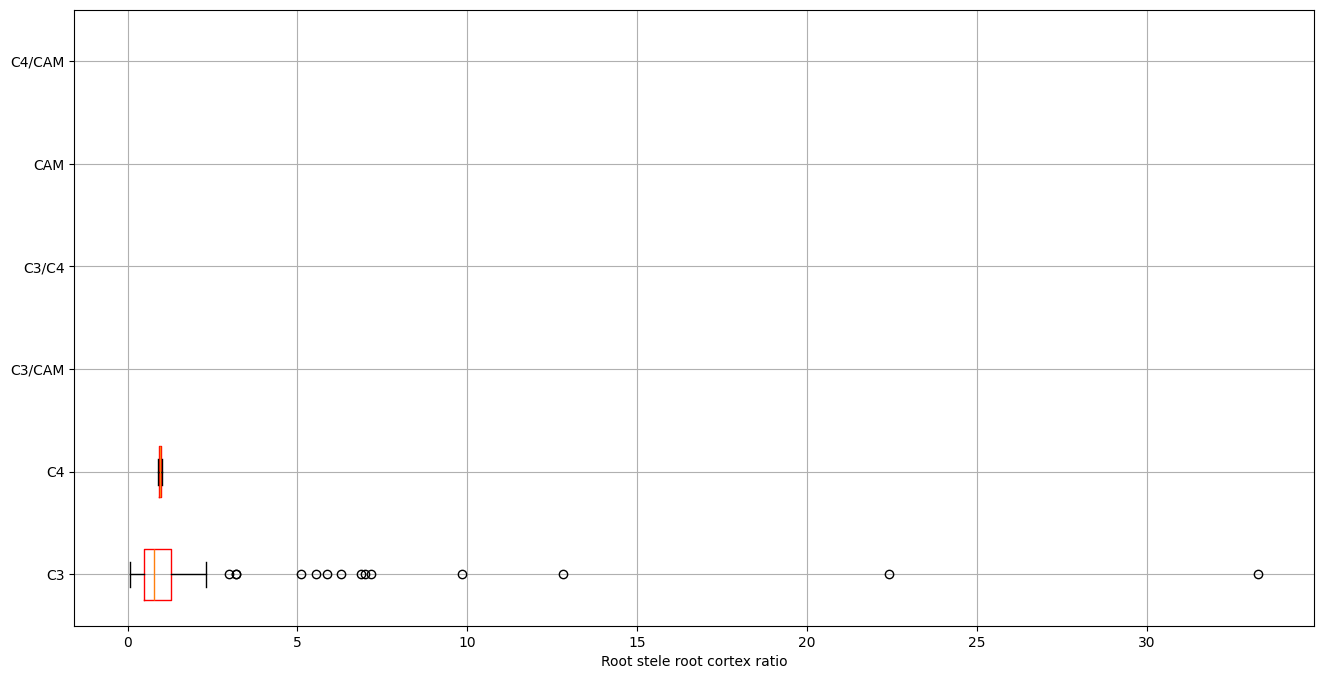

In [109]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_stele_root_cortex_ratio.isna()) & (data.F00043 == pway), "root_stele_root_cortex_ratio"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root stele root cortex ratio")
axes.grid()
plt.show()

In [86]:
data.dropna(subset="root_diameter").plant_taxonomy_genus_data_source.isna().mean()

np.float64(0.000983008004493751)

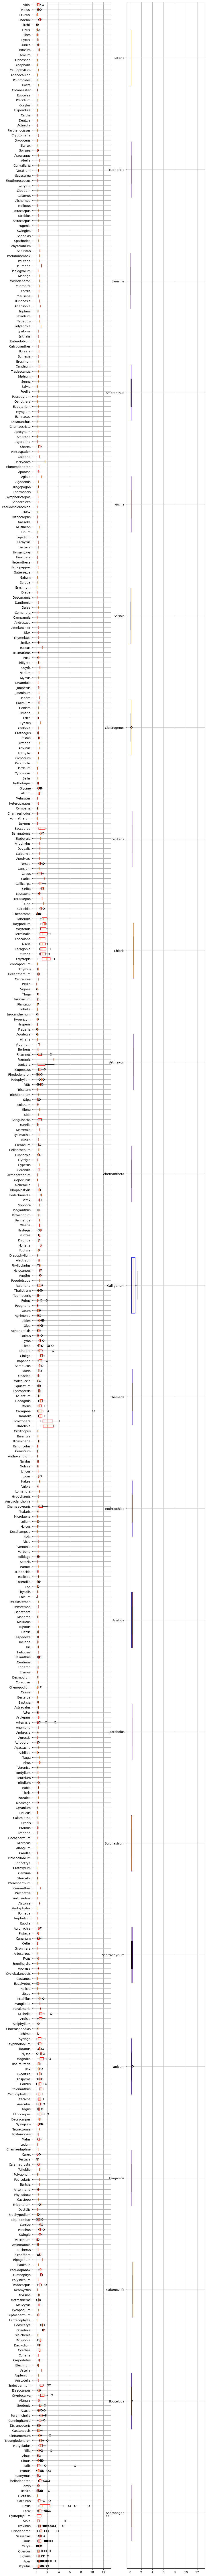

In [129]:
fig, (axes_l, axes_r) = plt.subplots(ncols=2, sharex=True)
fig.set_size_inches(10, 150)
__df = data.dropna(subset=["root_diameter", "plant_taxonomy_genus_data_source"]).query("F00043 == 'C3'")
axes_l.boxplot([__df.loc[__df.plant_taxonomy_genus_data_source == g, "root_diameter"] for g in \
              __df.plant_taxonomy_genus_data_source.unique()], orientation="horizontal", tick_labels=__df.plant_taxonomy_genus_data_source.unique(),
            boxprops={"color":"red"})
axes_l.grid()
__df = data.dropna(subset=["root_diameter", "plant_taxonomy_genus_data_source"]).query("F00043 == 'C4'")
axes_r.boxplot([__df.loc[__df.plant_taxonomy_genus_data_source == g, "root_diameter"] for g in \
              __df.plant_taxonomy_genus_data_source.unique()], orientation="horizontal", tick_labels=__df.plant_taxonomy_genus_data_source.unique(),
            boxprops={"color":"blue"})
axes_r.grid()
plt.show()

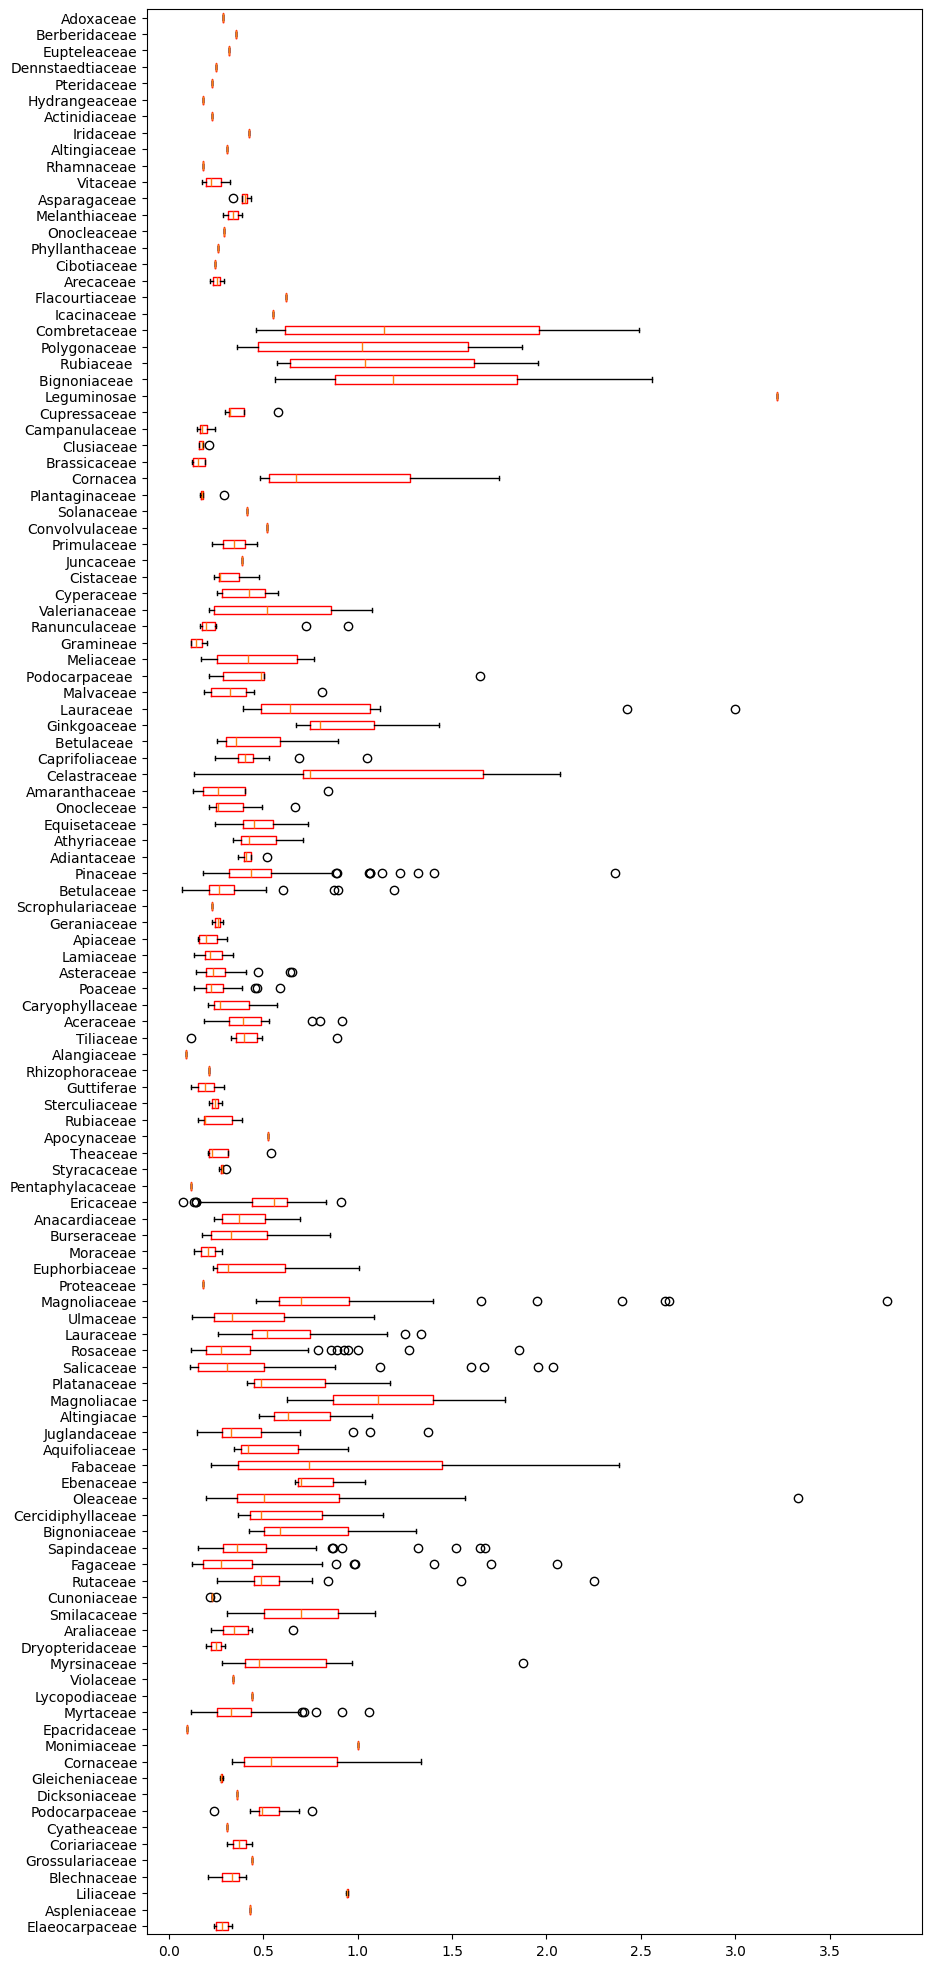

In [134]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 25)
__df = data.dropna(subset=["root_diameter", "plant_taxonomy_family_data_source"]).query("F00043 == 'C3'")
axes.boxplot([__df.loc[__df.plant_taxonomy_family_data_source == g, "root_diameter"] for g in \
              __df.plant_taxonomy_family_data_source.unique()], orientation="horizontal",
             tick_labels=__df.plant_taxonomy_family_data_source.unique(), boxprops={"color":"red"})
plt.show()

In [143]:
data.groupby(["plant_taxonomy_genus_data_source", "F00043"]).count()

,,root_diameter,specific_root_length,root_cortex_thickness,root_stele_root_cortex_ratio,plant_taxonomy_family_data_source,plant_taxonomy_species_data_source
plant_taxonomy_genus_data_source,F00043,,,,,,
Abelia,C3,1,1,0,0,1,1
Abies,C3,40,46,0,0,95,343
Abrus,C3,0,0,0,0,0,1
Abutilon,C3,0,0,0,0,0,1
Acacia,C3,31,26,8,0,31,179
...,...,...,...,...,...,...,...
Zinnia,C3,0,1,0,0,2,3
Zizia,C3,2,1,0,0,0,2
Ziziphus,C3,0,0,0,0,0,6


In [167]:
multi = pd.Series(index=data.plant_taxonomy_genus_data_source, data=pd.get_dummies(data.F00043).sum(axis=1).values).\
                groupby("plant_taxonomy_genus_data_source").mean()
multi[multi.values > 1]

Series([], dtype: float64)

In [174]:
fred.loc[fred.F00018 == "Atriplex", ["F00043", "F00018", "F00019"]]

,F00043,F00018,F00019
2917,C4,Atriplex,confertifolia
3356,C4,Atriplex,confertifolia
32639,C3,Atriplex,patula
32640,C3,Atriplex,patula
32641,C3,Atriplex,patula
33293,C4,Atriplex,tatarica
33368,C4,Atriplex,canescens
33377,C4,Atriplex,canescens
33423,C4,Atriplex,torreyi
33717,NaN,Atriplex,spinosa


# ___GRooT___
------------

In [175]:
groot.loc[:, "photosyntheticPathway"].unique()

array([nan, 'C3', 'C4', 'C3/CAM', 'CAM', 'C3/C4', 'C4/CAM'], dtype=object)

In [176]:
groot.loc[:, "photosyntheticPathway"].isna().mean()

np.float64(0.15714135630614068)

In [177]:
groot.traitName[groot.traitName.str.contains("diameter")].unique()

array(['Mean_Root_diameter', 'Root_stele_diameter',
       'Root_vessel_diameter'], dtype=object)

In [182]:
groot.loc[groot.traitName == "Mean_Root_diameter", ["photosyntheticPathway", # "traitName",
                                                    "traitValue"]].dropna(subset="photosyntheticPathway")

,photosyntheticPathway,traitValue
917,C3,0.5500
921,C3,0.5500
925,C3,0.5300
933,C3,0.6200
937,C3,0.7400
...,...,...
106801,C3,0.1686
106808,C3,0.0649
106815,C3,0.4627
106822,C3,0.2897


In [185]:
groot.photosyntheticPathway.unique()

array([nan, 'C3', 'C4', 'C3/CAM', 'CAM', 'C3/C4', 'C4/CAM'], dtype=object)

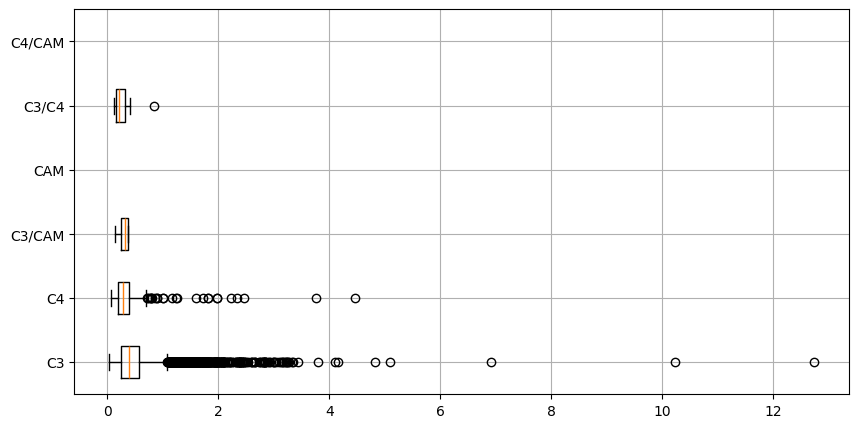

In [192]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 5)
axes.boxplot([groot.loc[(groot.traitName == "Mean_Root_diameter") & (groot.photosyntheticPathway == pway), "traitValue"] for \
              pway in ('C3', 'C4', 'C3/CAM', 'CAM', 'C3/C4', 'C4/CAM')], orientation="horizontal",
             tick_labels=('C3', 'C4', 'C3/CAM', 'CAM', 'C3/C4', 'C4/CAM'))
axes.grid()
plt.show()